### Download files

In [1]:
# be familiar with pathlib, urllib, gzip, idx3-ubyte standard, and matplotlib

In [2]:
from urllib.request import urlretrieve
from pathlib import Path

URL_train = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'

In [3]:
data_path = Path('/home/admin/projects/learn_miniai/nbs/data')
data_path.mkdir(parents=True, exist_ok=True)
train_image_fn = data_path/'train_image.gz'

In [4]:
if not train_image_fn.exists(): urlretrieve(URL_train, train_image_fn)

In [5]:
ls data

mnist.pkl.gz  temp/  train_image.gz


In [6]:
import gzip, pickle, struct
import numpy as np

In [7]:
with gzip.open(train_image_fn) as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))

In [8]:
magic, size, nrows, ncols

(2051, 60000, 28, 28)

In [9]:
# play with idx format https://www.fon.hum.uva.nl/praat/manual/IDX_file_format.html

In [10]:
# magic number                     -- b'\x00\x00\x08\x03' -> 0x08: unsigned byte, x03 -> 3 number of dimensions
#     size in dimension 1
#     size in dimension 2
#     size in dimension 3
#     ....
#     size in dimension N
#     data
with gzip.open(train_image_fn) as f:
    magic_number = f.read(4)
    print(f"value of thirth byte is {magic_number[2]}. It means 0x08: unsigned byte")
    print(f"value of fourth byte is {magic_number[3]}. It means 0x03: 3 dimentions")
    dimention1 = struct.unpack(">I", f.read(4))
    print(f"dimention1 {dimention1}")
# read value of each dimentions
# Here, ">II" is the format string used by struct.unpack().]
# The first character > specifies that the data should be packed in big-endian byte order,
# while the following two I's specify that the data should be interpreted as unsigned integers.

with gzip.open(train_image_fn) as f:
    # unpack at least 8 byte
    magic, dimention1, dimention2, dimention3 = struct.unpack(">IIII", f.read(16))
#     dimention2, dimention3 = struct.unpack(">II", f.read(8))
    print("dimention1", dimention1)
    print("dimention2", dimention2)
    print("dimention3", dimention3)
    # next path is data
    img_data = np.frombuffer(f.read(), dtype=np.uint8)
    assert len(img_data) == dimention1 * dimention2 * dimention3

value of thirth byte is 8. It means 0x08: unsigned byte
value of fourth byte is 3. It means 0x03: 3 dimentions
dimention1 (60000,)
dimention1 60000
dimention2 28
dimention3 28


In [11]:
img_data = img_data.reshape((dimention1, dimention2, dimention3))

In [12]:
img_data[0].shape

(28, 28)

In [13]:
# display image to test the reading value

In [14]:
from matplotlib import pyplot as plt

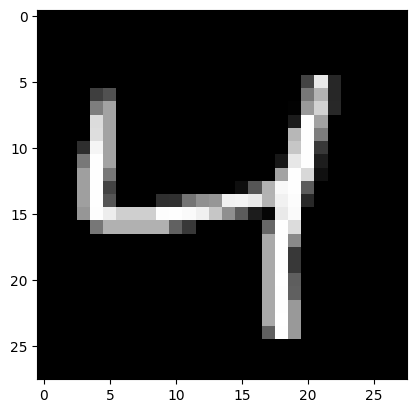

In [15]:
plt.imshow(img_data[2], cmap='gray')
plt.show()

In [16]:
# it cost a lot of effort to load data from draw data IDX_file_format.
# we can download mnist from other sources with more easy to use format.

In [17]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
data_fn = data_path/'mnist.pkl.gz'
if not data_fn.exists(): urlretrieve(MNIST_URL, data_fn)

In [18]:
ls data

mnist.pkl.gz  temp/  train_image.gz


In [19]:
# This pickle is save by python version 2
# Using encoding='latin1' is required for unpickling NumPy arrays
# and instances of datetime, date and time pickled by Python 2.

with gzip.open(data_fn, mode='rb') as f:
    ((x_train, y_train), (x_valid, y_valid), (x_test, y_test)) = pickle.load(f, encoding='latin1')

In [20]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

[]

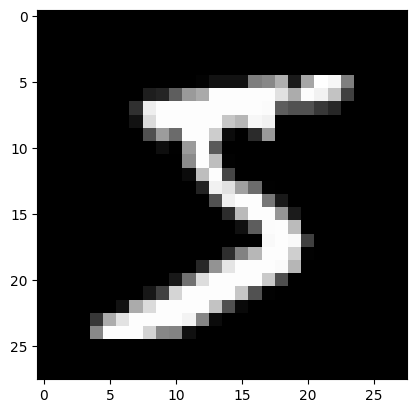

In [21]:
plt.imshow(x_train[0].reshape((28, 28)), cmap='gray')
plt.plot()

### Itertools

In [22]:
# be familiar with iterator and iterator building block

In [23]:
from itertools import chain

list1 = [1]
list2 = [4]
l = chain(list1, list2)
next(l), next(l)

(1, 4)

In [24]:
from itertools import zip_longest

list1 = [1, 2, 3]
list2 = [4]
xs = zip_longest(list1, list2)
for x in xs:
    print(x)

(1, 4)
(2, None)
(3, None)


In [25]:
from itertools import count

c = count(0)
for i in range(3):
    print(next(c))
print('----')
list1 = [1, 2, 3]
c = count(0)
xs = zip_longest(list1, c)
for _ in list1:
    print(next(xs))

0
1
2
----
(1, 0)
(2, 1)
(3, 2)


In [26]:
from itertools import combinations

for t in combinations("4123", 2):
    print(t)

('4', '1')
('4', '2')
('4', '3')
('1', '2')
('1', '3')
('2', '3')


In [27]:
from itertools import combinations

for t in combinations("4123", 2):
    print(t)

('4', '1')
('4', '2')
('4', '3')
('1', '2')
('1', '3')
('2', '3')


In [28]:
from itertools import permutations

for t in permutations("ABC", 3):
    print(t)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


In [29]:
from itertools import islice

my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for item in islice(my_list, 5):
    print(item)
    
# using islice for iter
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
xs = iter(my_list)
list(islice(xs, 5)), list(islice(xs, 5)), list(islice(xs, 5))

1
2
3
4
5


([1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [])

In [30]:
# iter 
# iter(object) - create a normal iter
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
xs = iter(my_list)
print(next(xs), next(xs))

# iter(object, sentinel) - generate data from object function until returned data == sentinel
my_list = [1, 2, 3]
xs = iter(my_list)
next_x = lambda: list(islice(xs, 2))
list(iter(next_x, []))

1 2


[[1, 2], [3]]

In [31]:
# lambda: define a small, anonymous functions in python
three = lambda: 3
print(three())

plus_three = lambda x: x + 3
print(plus_three(2))

3
5


In [32]:
# using islice and iter instead of reshape

In [33]:
x0 = x_train[0]

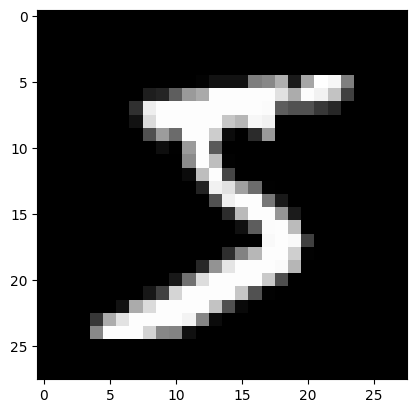

In [34]:
plt.imshow(x0.reshape((28, 28)), cmap='gray')

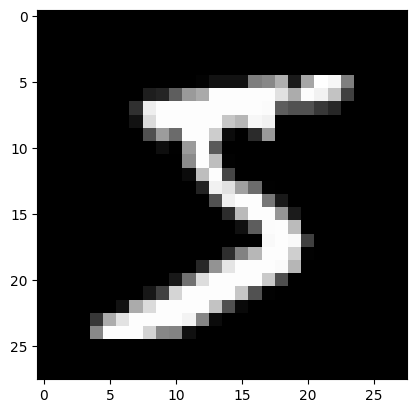

In [35]:
it = iter(x0)

def next_row():
    return list(islice(it, 28))
img = list(iter(next_row, []))

plt.imshow(img, cmap='gray')

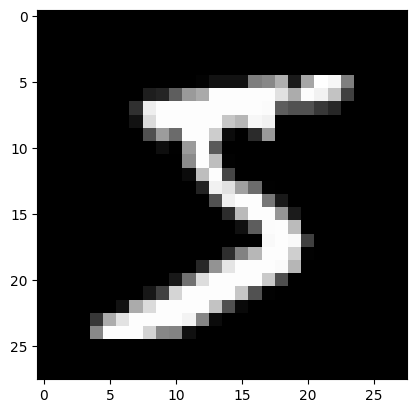

In [36]:
# using lambda and iter

it = iter(x0)
img = list(iter(lambda: list(islice(it, 28)), []))
plt.imshow(img, cmap='gray')

### Matrix and Tensor

In [37]:
class Matrix():
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxes): return self.xs[idxes[0]][idxes[1]]
        
        
m = Matrix(img)
m[20,15]

0.98828125

In [38]:
from torch import tensor

In [39]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid,))
x_train.shape

torch.Size([50000, 784])

In [40]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

In [41]:
imgs = x_train.reshape((-1, 28, 28))

In [42]:
imgs[0, 20, 15]

tensor(0.9883)

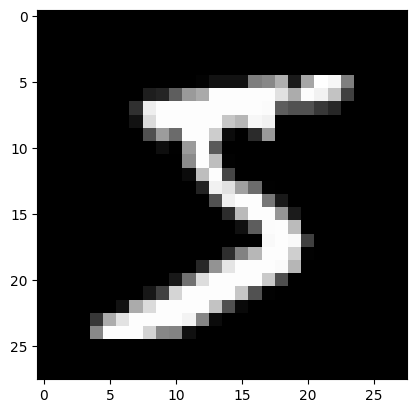

In [43]:
plt.imshow(imgs[0], cmap='gray')
plt.show()

In [44]:
n, c = x_train.shape

### Matrix mutiplication

In [45]:
import torch

torch.manual_seed(1)

weight = torch.randn((784, 10))
bias = torch.zeros(10)

In [46]:
m1 = x_valid[0:5]; print(m1.shape)
m2 = weight; print(m2.shape)

torch.Size([5, 784])
torch.Size([784, 10])


In [47]:
ar, ac = m1.shape
br, bc = m2.shape

In [48]:
t1 = torch.zeros((ar, bc)); print(t1.shape)

torch.Size([5, 10])


In [49]:
for i in range(ar):
    for j in range(ac):
        for k in range(bc):
            t1[i,k] += m1[i,j] * m2[j,k]

In [50]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [51]:
torch.set_printoptions(precision=2, linewidth=170)

In [52]:
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [53]:
m1 @ m2

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [54]:
torch.allclose(t1, m1@m2)

True

In [55]:
def matmul(m1, m2):
    ar, ac = m1.shape
    br, bc = m2.shape
    t1 = torch.zeros((ar, bc))
    for i in range(ar):
        for j in range(ac):
            for k in range(bc):
                t1[i,k] += m1[i,j] * m2[j,k]
    return t1

t1 = matmul(m1, m2)

assert torch.allclose(t1, m1@m2)

t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [56]:
%time _ = matmul(m1, m2)

CPU times: user 2.44 s, sys: 48.2 ms, total: 2.49 s
Wall time: 464 ms


In [57]:
ar * ac * bc

39200

### Numba

In [58]:
from numba import njit

np.set_printoptions(precision=2, linewidth=270)

In [59]:
# pip install numba

In [60]:
@njit
def dot(a,b):
    res = .0
    for i in range(len(a)): res += a[i] * b[i]
    return res

a, b = m1[0].numpy(), m2[:, 0].numpy()

%time dot(a, b)

CPU times: user 581 ms, sys: 1.2 s, total: 1.78 s
Wall time: 191 ms


-10.94173222349491

In [61]:
%time dot(a, b)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 7.39 µs


-10.94173222349491

In [62]:
np_m1, np_m2 = m1.numpy(), m2.numpy()

In [63]:
t1 = np.zeros((ar, bc))
for i in range(ar):
    for k in range(bc): t1[i,k] = dot(np_m1[i,:], np_m2[:,k])
t1

array([[-10.94,  -0.68,  -7.  ,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
       [ 14.54,   6.  ,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
       [  2.22,  -3.22,  -4.8 ,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
       [ -6.71,   8.9 ,  -7.46,  -7.9 ,   2.7 ,  -4.73, -11.03, -12.98,  -6.44,   3.64],
       [ -2.44,  -6.4 ,  -2.4 ,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [64]:
def jit_matmul(m1, m2):
    t1 = np.zeros((ar, bc))
    for i in range(ar):
        for k in range(bc): t1[i,k] = dot(m1[i,:], m2[:,k])
    return t1

%time jit_matmul(np_m1, np_m2)

CPU times: user 78 µs, sys: 0 ns, total: 78 µs
Wall time: 79.9 µs


array([[-10.94,  -0.68,  -7.  ,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
       [ 14.54,   6.  ,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
       [  2.22,  -3.22,  -4.8 ,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
       [ -6.71,   8.9 ,  -7.46,  -7.9 ,   2.7 ,  -4.73, -11.03, -12.98,  -6.44,   3.64],
       [ -2.44,  -6.4 ,  -2.4 ,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [65]:
t2 = jit_matmul(np_m1, np_m2)

In [66]:
torch.allclose(torch.Tensor(t2), m1@m2)

True

### Elementwise opts

In [67]:
sum(m1[0, :] * m2[:,0])

tensor(-10.94)

In [68]:
def matmul(m1, m2):
    (ar, ac), (br, bc) = m1.shape, m2.shape
    c = np.zeros((ar, bc))
    for i in range(ar):
        for k in range(bc): c[i,k] = (m1[i, :] * m2[:,k]).sum()
    return c

matmul(m1, m2)

array([[-10.94,  -0.68,  -7.  ,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
       [ 14.54,   6.  ,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
       [  2.22,  -3.22,  -4.8 ,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
       [ -6.71,   8.9 ,  -7.46,  -7.9 ,   2.7 ,  -4.73, -11.03, -12.98,  -6.44,   3.64],
       [ -2.44,  -6.4 ,  -2.4 ,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [69]:
%time _ = matmul(m1, m2)

CPU times: user 9.67 ms, sys: 1.52 ms, total: 11.2 ms
Wall time: 918 µs


### Broadcasting

In [70]:
# learn how broadcasting work

In [71]:
import torch

scalar = torch.tensor(3)
vector = torch.tensor([1, 2, 3])
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])

In [72]:
scalar + vector

tensor([4, 5, 6])

In [73]:
print(vector.shape)
vector

torch.Size([3])


tensor([1, 2, 3])

In [74]:
print(matrix.shape)
matrix

torch.Size([2, 3])


tensor([[1, 2, 3],
        [4, 5, 6]])

In [75]:
print((matrix + vector).shape)
matrix + vector

torch.Size([2, 3])


tensor([[2, 4, 6],
        [5, 7, 9]])

In [76]:
matrix.reshape(3,2).shape

torch.Size([3, 2])

In [77]:
# matrix.reshape(3,2) + vector
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# Input In [77], in <cell line: 1>()
# ----> 1 matrix.reshape(3,2) + vector

# RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [78]:
matrix.reshape(3,2) + vector.reshape(3,1)

tensor([[2, 3],
        [5, 6],
        [8, 9]])

In [79]:
# (5,3,4,1) and (5,3,1,1) -> (5,3,4,1) one dim is 1
(torch.randn((5,3,4,1)) + torch.randn((5,3,1,1))).shape

torch.Size([5, 3, 4, 1])

In [80]:
# (5,3,4,1) and (  3,4,1) -> (5,3,4,1) - one dim doesn't exist
(torch.randn((5,3,4,1)) + torch.randn((3,4,1))).shape

torch.Size([5, 3, 4, 1])

In [81]:
# (5,3,4,1) and (4,1) -> (5,3,4,1) - two dim doesn't exist
(torch.randn((5,3,4,1)) + torch.randn((4,1))).shape

torch.Size([5, 3, 4, 1])

In [82]:
# (5,3,4,1) and (1) -> (5,3,4,1) - three dim doesn't exist
(torch.randn((5,3,4,1)) + torch.randn((1))).shape

torch.Size([5, 3, 4, 1])

In [83]:
# broadcasting is apply inside out follow query rule. Like 5 vector (3) will create a metric (5,3).
# 4 metric (5,3) will create (4,5,3) 3D metric.

In [84]:
# (5,3,4,1) and (2,1) -> (5,3,4,1) - three dim doesn't exist
(torch.randn((5, 3, 4, 1)) + torch.randn((1,1,4,1))).shape

torch.Size([5, 3, 4, 1])

### Broadcasting matric multiplication

In [85]:
m1.shape

torch.Size([5, 784])

In [86]:
m2.shape

torch.Size([784, 10])

In [87]:
(ar, ac), (br, bc) = m1.shape, m2.shape
c = np.zeros((ar, bc))
for i in range(bc): c[:, i] = (m1 * m2[:,i]).sum(1)
c

array([[-10.94,  -0.68,  -7.  ,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
       [ 14.54,   6.  ,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
       [  2.22,  -3.22,  -4.8 ,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
       [ -6.71,   8.9 ,  -7.46,  -7.9 ,   2.7 ,  -4.73, -11.03, -12.98,  -6.44,   3.64],
       [ -2.44,  -6.4 ,  -2.4 ,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [88]:
def matmul(m1, m2):
    (ar, ac), (br, bc) = m1.shape, m2.shape
    c = torch.zeros((ar, bc))
    for i in range(bc): c[:, i] = (m1 * m2[:,i]).sum(1)
    return c

torch.allclose(matmul(m1, m2), m1@m2)

%time matmul(x_train, weight)

CPU times: user 2.59 s, sys: 1.23 s, total: 3.81 s
Wall time: 318 ms


tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [89]:
### Einstein

In [90]:
from torch import einsum
# simple way to apply einstein notion in python

In [91]:
import torch

c = torch.einsum('ij,jk->ik', m1, m2)
c

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [92]:
%time torch.einsum('ij,jk->ik', x_train, weight)

CPU times: user 311 ms, sys: 9.68 ms, total: 321 ms
Wall time: 26.7 ms


tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

## pytorch op

In [95]:
%time _=torch.matmul(x_train, weight)

CPU times: user 458 ms, sys: 9.59 ms, total: 467 ms
Wall time: 39 ms


In [96]:
%time _=x_train@weight

CPU times: user 441 ms, sys: 9.99 ms, total: 451 ms
Wall time: 37.5 ms


## cuda

In [108]:
# pytorch
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [111]:
cuda_x =  x_train.to(device)
cuda_weight = weight.to(device)

In [122]:
%time _=cuda_x@cuda_weight

CPU times: user 556 µs, sys: 0 ns, total: 556 µs
Wall time: 361 µs


In [123]:
# [TODO: numba cuda jit]